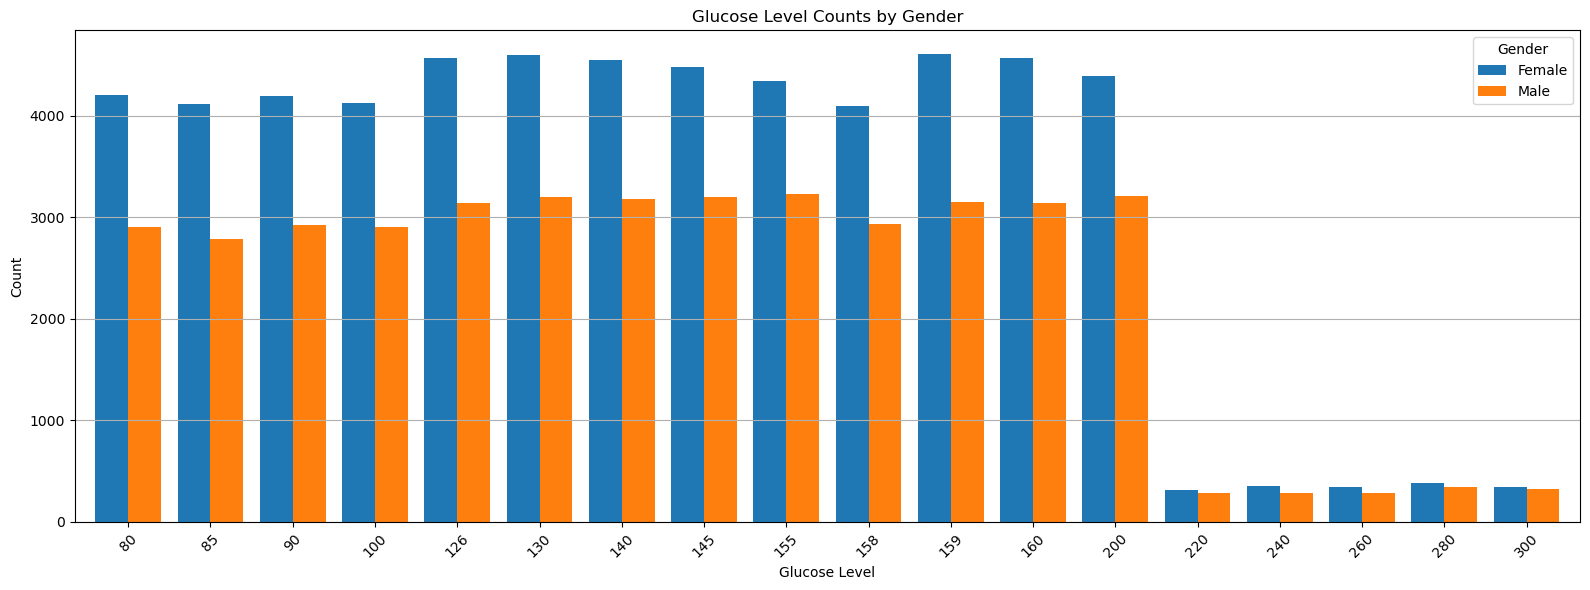

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Set the path of Hadoop output text file
file_path = "part-r-00000.txt" 

# Read and parse the file
data = []
with open(file_path, "r") as f:
    for line in f:
        try:
            key, count = line.strip().split("\t")
            gender, glucose = key.split(",")
            data.append({"Gender": gender, "Glucose": int(glucose), "Count": int(count)})
        except:
            continue  # skip malformed lines

# Create DataFrame
df = pd.DataFrame(data)

# Pivot for plotting: rows=Glucose, columns=Gender, values=Count
pivot_df = df.pivot(index='Glucose', columns='Gender', values='Count').fillna(0).sort_index()

# Plot: grouped bar chart
ax = pivot_df[['Female', 'Male']].plot(kind='bar', figsize=(16, 6), width=0.8)

# Customize plot
plt.title("Glucose Level Counts by Gender")
plt.xlabel("Glucose Level")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.grid(True, axis='y')
plt.tight_layout()

# Show plot
plt.show()
